In [1]:
pip install opencv-python

In [3]:
import cv2

In [4]:
print(cv2.__version__)

4.11.0


In [5]:
import os
print(os.getcwd())  # Sprawdza bieżący katalog
print(os.listdir())  # Wyświetla pliki w katalogu

c:\PRACA\IT\TABLICA\sample jpg\OpenCV_Scikit-image
['.git', 'OpenCV_SKI.ipynb', 'README.md', 'sample.jpg']


In [6]:
obraz = cv2.imread("sample.jpg")
if obraz is None:
    print("Błąd: Nie udało się wczytać obrazu!")
else:
    print("Obraz wczytany poprawnie!")

Obraz wczytany poprawnie!


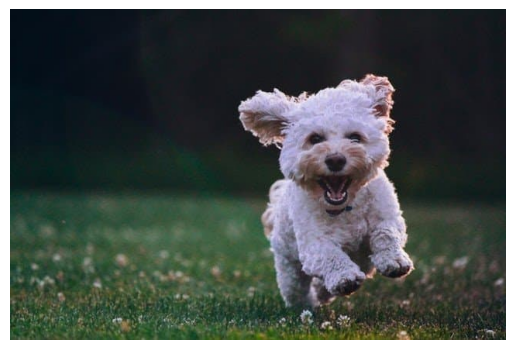

In [7]:
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

sciezka = r"C:\PRACA\IT\TABLICA\sample jpg\OpenCV_Scikit-image\sample.jpg"
obraz = cv2.imread(sciezka)

# Konwersja BGR → RGB 
obraz = cv2.cvtColor(obraz, cv2.COLOR_BGR2RGB)

# Wyświetlenie obrazu
plt.imshow(obraz)
plt.axis("off")
plt.show()

Konwersja obrazu do skali szarości

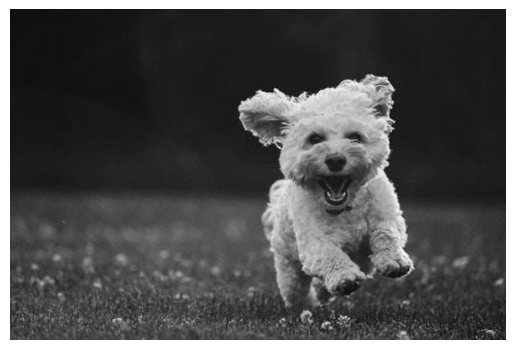

In [8]:
obraz_szary = cv2.cvtColor(obraz, cv2.COLOR_BGR2GRAY)

plt.imshow(obraz_szary, cmap="gray")
plt.axis("off")
plt.show()

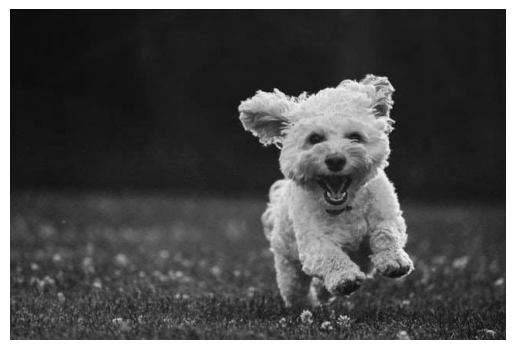

In [9]:
import numpy as np

obraz_szary_manual = np.mean(obraz, axis=2)

plt.imshow(obraz_szary_manual, cmap="gray")
plt.axis("off")
plt.show()

Wykrywanie krawędzi metodą Canny’ego:

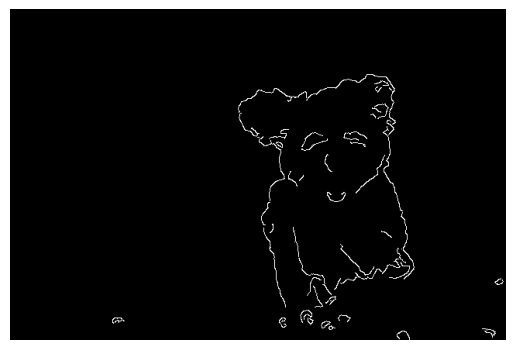

In [87]:
blurred = cv2.GaussianBlur(obraz_szary, (7, 7), 0)
edges = cv2.Canny(blurred, 100, 220)

plt.imshow(edges, cmap="gray")
plt.axis("off")
plt.show()

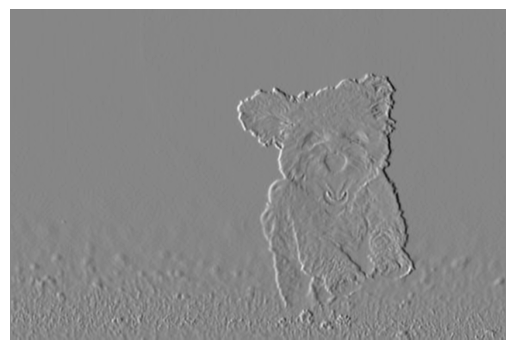

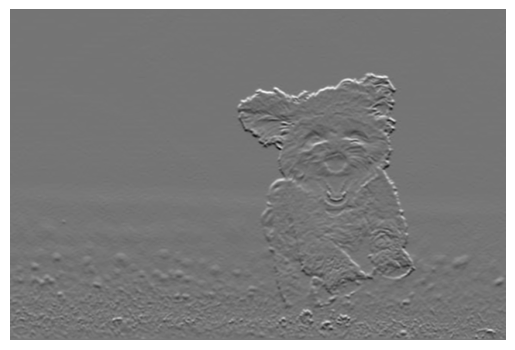

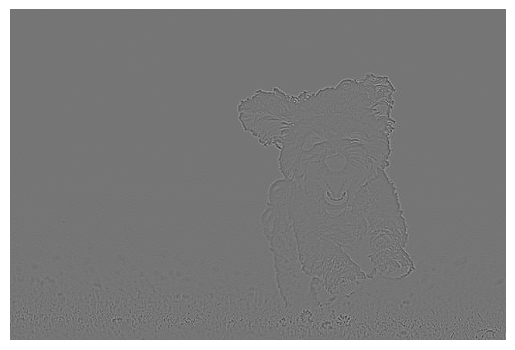

In [11]:
sobel_x = cv2.Sobel(obraz_szary, cv2.CV_64F, 1, 0, ksize=5)  # Gradient w poziomie
sobel_y = cv2.Sobel(obraz_szary, cv2.CV_64F, 0, 1, ksize=5)  # Gradient w pionie
plt.imshow(sobel_x, cmap="gray")
plt.axis("off")
plt.show()
plt.imshow(sobel_y, cmap="gray")
plt.axis("off")
plt.show()

laplacian = cv2.Laplacian(obraz_szary, cv2.CV_64F)
plt.imshow(laplacian, cmap="gray")
plt.axis("off")
plt.show()

Filtr Gaussa do redukcji szumu:

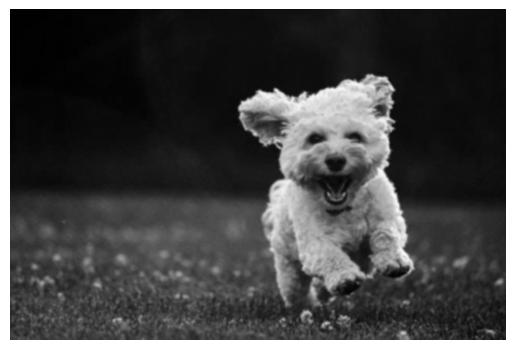

In [12]:
blur = cv2.GaussianBlur(obraz_szary, (5,5), 0)
plt.imshow(blur, cmap="gray")
plt.axis("off")
plt.show()

Znalezienie konturów

[61.5, 53.5, 46.5, 44.0, 34.0, 31.5, 30.0, 26.0, 21.0, 20.0, 19.0, 18.5, 16.5, 16.0, 15.5, 15.5, 12.5, 11.5, 11.5, 11.0, 11.0, 10.0, 10.0, 9.5, 9.0, 9.0, 9.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 7.5, 7.5, 7.5, 7.0, 6.5, 6.0, 6.0, 6.0, 6.0, 5.5, 5.0, 5.0, 5.0, 4.0, 3.5, 2.5, 1.0, 0.0, 0.0]


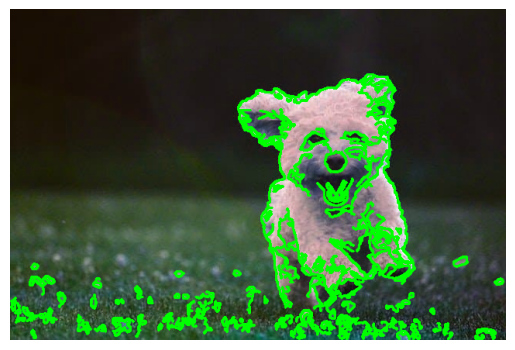

In [91]:
kontury, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

areas = [cv2.contourArea(c) for c in kontury]
print(sorted(areas, reverse=True))

if areas:
    min_area = np.percentile(areas, 70)  
    kontury = [c for c in kontury if cv2.contourArea(c) > min_area]

cv2.drawContours(obraz_kontury, kontury, -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(obraz_kontury, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

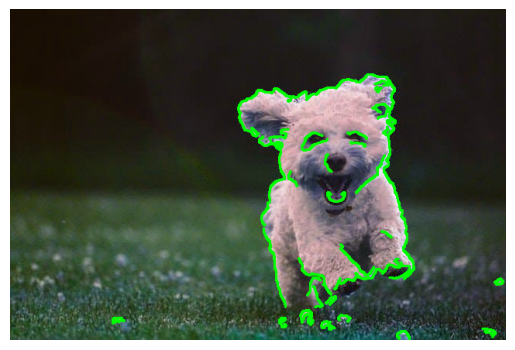

In [128]:
kontury, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
kontury = [c for c in kontury if cv2.contourArea(c) > 5] 
obraz_kontury = obraz.copy()

cv2.drawContours(obraz_kontury, kontury, -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(obraz_kontury, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

Segmentacja:

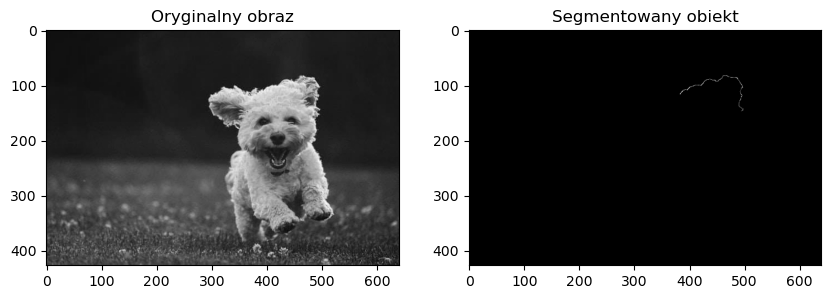

In [190]:
najwiekszy_kontur = max(kontury, key=cv2.contourArea)
maska = np.zeros_like(obraz_szary)
cv2.drawContours(maska, [najwiekszy_kontur], -1, 255, thickness=cv2.FILLED)

segmentacja = cv2.bitwise_and(obraz_szary, obraz_szary, mask=maska)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Oryginalny obraz")
plt.imshow(obraz_szary, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Segmentowany obiekt")
plt.imshow(segmentacja, cmap="gray")

plt.show()

Rozpoznawanie obiektów:

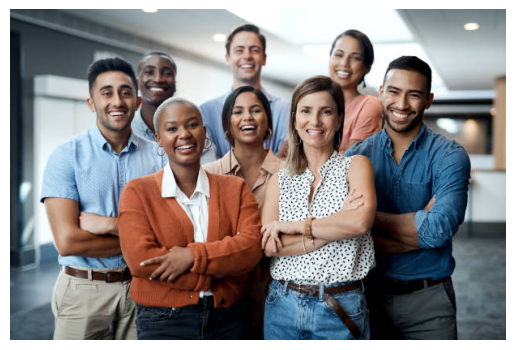

In [221]:
sciezka2 = r"C:\PRACA\IT\TABLICA\sample jpg\OpenCV_Scikit-image\istockphoto-1344872631-612x612.jpg"
obraz_2 = cv2.imread(sciezka2)

obraz_2 = cv2.cvtColor(obraz_2, cv2.COLOR_BGR2RGB)

plt.imshow(obraz_2)
plt.axis("off")
plt.show()

Wycinanie twarzy:

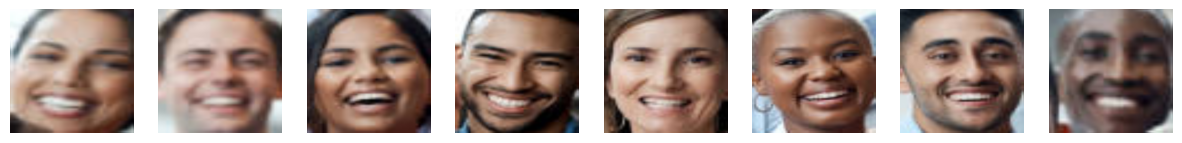

In [222]:
from skimage.transform import resize

kopia = obraz_2.copy()
faces = []

for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > 0.22:
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")

        face = obraz_2[startY:endY, startX:endX]
        if face.shape[0] == 0 or face.shape[1] == 0:
            continue

        face_resized = resize(face, (227, 227), anti_aliasing=True)
        faces.append(face_resized)

        cv2.rectangle(kopia, (startX, startY), (endX, endY), (0, 255, 0), 2)

fig, axes = plt.subplots(1, len(faces), figsize=(15, 5))
for i, face in enumerate(faces):
    axes[i].imshow(face)
    axes[i].axis("off")

plt.show()

In [227]:
age_proto = "age_deploy.prototxt"
age_model = "age_net.caffemodel"
gender_proto = "gender_deploy.prototxt"
gender_model = "gender_net.caffemodel"

age_net = cv2.dnn.readNetFromCaffe(age_proto, age_model)
gender_net = cv2.dnn.readNetFromCaffe(gender_proto, gender_model)

age_list = ["0-2", "4-6", "8-12", "15-20", "25-32", "38-43", "48-53", "60+"]
gender_list = ["Kobieta", "Mężczyzna"]

for i, face in enumerate(faces):
    face_bgr = (face * 255).astype(np.uint8) 
    blob = cv2.dnn.blobFromImage(face_bgr, scalefactor=1.0, size=(227, 227), mean=(78.4263377603, 87.7689143744, 114.895847746), swapRB=False)

    gender_net.setInput(blob)
    gender_preds = gender_net.forward()
    gender = gender_list[gender_preds[0].argmax()]

    age_net.setInput(blob)
    age_preds = age_net.forward()
    age = age_list[age_preds[0].argmax()]

    print(f"Osoba {i+1}: {gender}, Wiek: {age}")

Osoba 1: Kobieta, Wiek: 8-12
Osoba 2: Kobieta, Wiek: 25-32
Osoba 3: Kobieta, Wiek: 8-12
Osoba 4: Kobieta, Wiek: 25-32
Osoba 5: Kobieta, Wiek: 25-32
Osoba 6: Kobieta, Wiek: 8-12
Osoba 7: Kobieta, Wiek: 25-32
Osoba 8: Kobieta, Wiek: 8-12


In [240]:
from deepface import DeepFace

In [245]:
prototxt_path = "deploy.prototxt"
model_path = "res10_300x300_ssd_iter_140000.caffemodel"
net = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)

(h, w) = obraz_2.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.cvtColor(obraz_2, cv2.COLOR_RGB2BGR),
                             scalefactor=1.0, size=(300, 300),
                             mean=(104.0, 177.0, 123.0))
net.setInput(blob)
detections = net.forward()

faces = []
coords = []

for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > 0.22:
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        if startX < 0: startX = 0
        if startY < 0: startY = 0

        face = obraz_2[startY:endY, startX:endX]
        if face.size == 0:
            continue

        faces.append(face)
        coords.append((startX, startY, endX, endY))

In [246]:
for i, face in enumerate(faces):
    try:
        result = DeepFace.analyze(face, actions=["age", "gender"])
        print(f"Osoba {i+1}: Płeć: {result['gender']}, Wiek: {result['age']}")
    except Exception as e:
        print(f"Błąd analizy twarzy nr {i+1}: {e}")

Błąd analizy twarzy nr 1: module 'deepface.modules.modeling' has no attribute 'build_model'
Błąd analizy twarzy nr 2: module 'deepface.modules.modeling' has no attribute 'build_model'
Błąd analizy twarzy nr 3: module 'deepface.modules.modeling' has no attribute 'build_model'
Błąd analizy twarzy nr 4: module 'deepface.modules.modeling' has no attribute 'build_model'
Błąd analizy twarzy nr 5: module 'deepface.modules.modeling' has no attribute 'build_model'
Błąd analizy twarzy nr 6: module 'deepface.modules.modeling' has no attribute 'build_model'
Błąd analizy twarzy nr 7: module 'deepface.modules.modeling' has no attribute 'build_model'
Błąd analizy twarzy nr 8: module 'deepface.modules.modeling' has no attribute 'build_model'
